In [40]:
import numpy as np
import pandas as pd
import matplotlib

In [41]:
data_test = pd.read_csv("Twitter_data.csv",delimiter=',',skipinitialspace=True, names =
                        ['TweetID','Day', 'Hour', 'Lang', 'IsReshare', 'Reach', 'RetweetCount', 'Likes', 'Sentiment', 'text', 'LocationID', 'UserID'],index_col = False,engine='python')
data_test=data_test.dropna()
data_test.drop_duplicates(keep=False,inplace=True)


data_output=data_test.drop(['TweetID', 'Hour', 'Lang', 'IsReshare', 'Reach', 'RetweetCount', 'Likes', 'Sentiment', 'text', 'LocationID', 'UserID'], axis = 1)
data_test=data_test.drop(['Day','TweetID','Lang','IsReshare','text','UserID'], axis=1)

data_output=data_output.drop([data_output.index[0]])
data_test=data_test.drop([data_test.index[0]])

data_test['Hour'] = data_test['Hour'].astype(float)
data_test['Reach'] = data_test['Reach'].astype(float)
data_test['RetweetCount'] = data_test['RetweetCount'].astype(float)
data_test['Likes'] = data_test['Likes'].astype(float)
data_test['Sentiment'] = data_test['Sentiment'].astype(float)
data_test['LocationID'] = data_test['LocationID'].astype(float)


for column in data_test.columns:
    data_test[column] = data_test[column]  / data_test[column].abs().max()


data_output=data_output.drop([data_output.index[0]])
data_test=data_test.drop([data_test.index[0]])



data_output=data_output.replace('Sunday',1)
data_output=data_output.replace('Monday',2)
data_output=data_output.replace('Tuesday',3)
data_output=data_output.replace('Wednesday',4)
data_output=data_output.replace('Thursday', 5)
data_output=data_output.replace('Friday', 6)
data_output=data_output.replace('Saturday', 7)

X=data_test.to_numpy()
X=X.astype(np.float64)
Y=data_output.to_numpy()
Y=Y.astype(np.int32)

# X= np.array([[0.40,0.53],
#               [0.22,0.32],
#               [0.35,0.32],
#               [0.26,0.19],
#               [0.08,0.41],
#               [0.35,0.30],
#               [0.80,0.98],
#               [0.28,0.33]
# ])


# data_output
# data_test

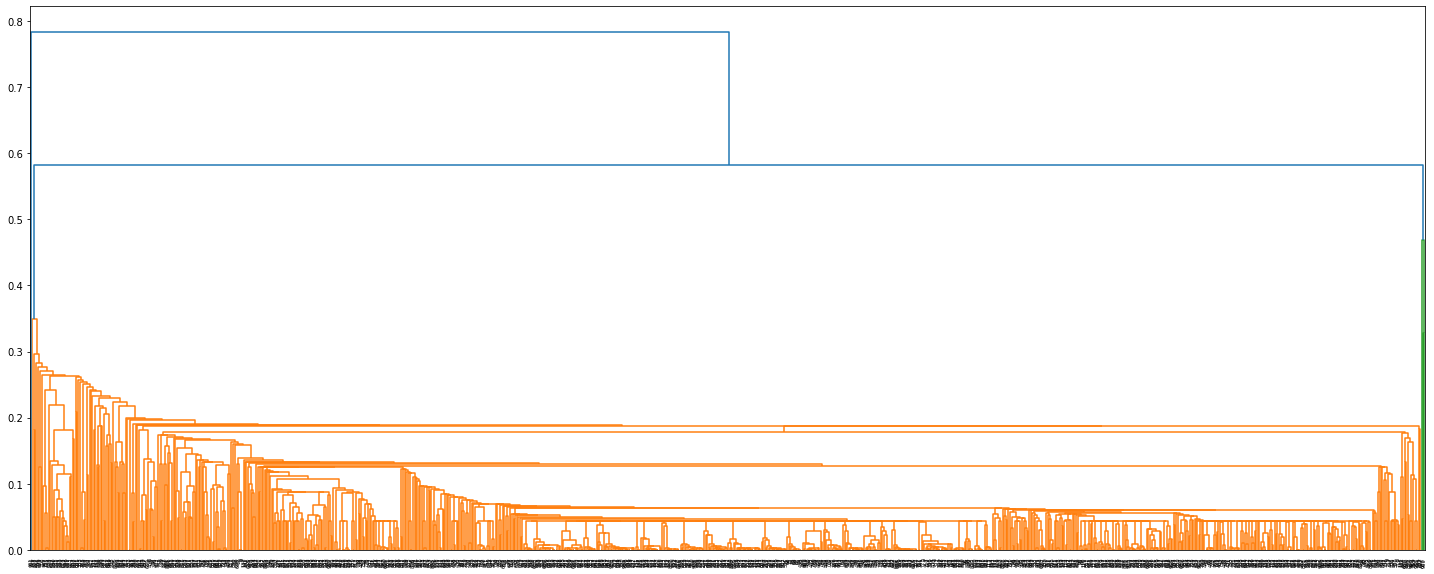

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

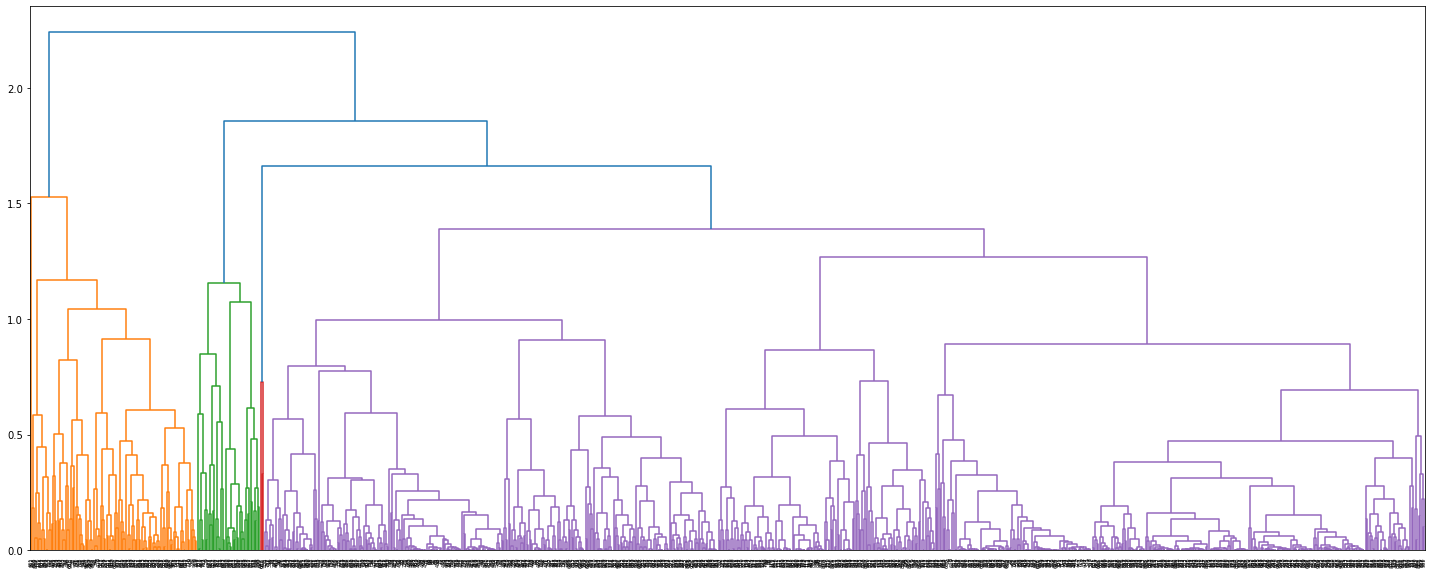

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [44]:
# calculates distance between disjoint sets
def simple_or_complete_linkage(a,b,distance_matrix):
    minimum=10e6
    maximum=-10e6
    for i in range(len(a)):
        for j in range(len(b)):
            current=distance_matrix[a[i],b[j]]
            if(current<minimum):
                minimum=current
            if(current>maximum):
                maximum=current
    return minimum,maximum
    


In [45]:
#HAC for simple
def calculate_distance_simple(samples,distance_matrix,progression):
    minimum_simple=10e6
    for i in range (len(samples)):       
        for j in range(i+1,len(samples)):
            if(len(samples[i])!=1 or len(samples[j])!=1):               
                current_simple,current_complete=simple_or_complete_linkage(progression[i],progression[j],distance_matrix)                
            else:
#                 current_simple=np.linalg.norm(np.array(samples[i][0])-np.array(samples[j][0]))
                current_simple=distance_matrix[progression[i][0],progression[j][0]]
            if current_simple<minimum_simple:                
                minimum_simple=current_simple
                a=samples[i]
                b=samples[j]
                c=progression[i]
                d=progression[j]
                
    
    return a,b,c,d

In [46]:
# HAC for complete
def calculate_distance_complete(samples,distance_matrix,progression):
    minimum_complete=10e6
    for i in range (len(samples)):
        for j in range(i+1,len(samples)):
            if(len(samples[i])!=1 or len(samples[j])!=1):
                current_simple,current_complete=simple_or_complete_linkage(progression[i],progression[j],distance_matrix) 
            else:
#                 current_complete=np.linalg.norm(np.array(samples[i][0])-np.array(samples[j][0])) 
                current_complete=distance_matrix[progression[i][0],progression[j][0]]
            if current_complete<minimum_complete:
                minimum_complete=current_complete
                a=samples[i]
                b=samples[j]
                c=progression[i]
                d=progression[j]
    
    return a,b,c,d

In [47]:
# joins the disjoint sets
def join(a,b,c,d,samples,progression):
    
    if len(a)<len(b):
        for i in range (len(samples)):
            if samples[i]==b:
                for x in a :
                    samples[i].append(x)
                for x in c:
                    progression[i].append(x)
        samples.remove(a)
        progression.remove(c)
        
    else:
        for j in range (len(samples)):
            if samples[j]==a:
                for x in b :                   
                    samples[j].append(x)
                for x in d:
                    progression[j].append(x)
        samples.remove(b)
        progression.remove(d)
        
        
        

In [48]:
# creates the distance matrix
def create_matrix(samples):
    Distance_mat = np.zeros((len(samples),len(samples)))
    for i in range(Distance_mat.shape[0]):
        for j in range(Distance_mat.shape[0]):
            if i!=j:
                Distance_mat[i,j] = np.linalg.norm(np.array(samples[i][0])-np.array(samples[j][0]))
            else:
                Distance_mat[i,j] = 10**6
    return Distance_mat

In [49]:
# this is for complete
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
# print(samples)
distance_matrix=create_matrix(samples)


while(len(samples)!=4):    
    a,b,c,d=calculate_distance_complete(samples,distance_matrix,progression)
    print(c,d)
    print("\n")
    join(a,b,c,d,samples,progression)


[4] [6]


[4, 6] [12]


[41] [423]


[78] [462]


[101] [105]


[116] [818]


[169] [171]


[172] [173]


[212] [898]


[269] [941]


[308] [309]


[308, 309] [312]


[339] [344]


[360] [364]


[377] [378]


[377, 378] [383]


[377, 378, 383] [384]


[377, 378, 383, 384] [385]


[377, 378, 383, 384, 385] [387]


[408] [409]


[432] [433]


[435] [441]


[476] [477]


[481] [482]


[486] [813]


[518] [866]


[539] [543]


[597] [609]


[646] [653]


[684] [685]


[737] [738]


[737, 738] [739]


[817] [823]


[824] [825]


[837] [838]


[850] [852]


[850, 852] [853]


[869] [870]


[953] [955]


[971] [986]


[987] [988]


[308, 309, 312] [645]


[116, 818] [489]


[407] [742]


[432, 433] [438]


[78, 462] [85]


[349] [357]


[712] [721]


[279] [597, 609]


[118] [492]


[191] [539, 543]


[360, 364] [671]


[524] [869, 870]


[945] [954]


[31] [407, 742]


[970] [985]


[597, 609, 279] [610]


[298] [979]


[795] [800]


[138] [499]


[596] [597, 609, 279, 610]


[287] [298, 979

[467, 469] [793]


[292] [630]


[68] [74, 456, 65, 76, 66, 67, 69, 73, 75]


[91] [96]


[597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285] [945, 954, 277]


[274] [947]


[81] [794]


[893] [904]


[377, 378, 383, 384, 385, 387, 379, 374, 367, 704, 698, 369, 376, 695, 696, 699, 382] [692]


[228, 234, 233, 563, 567] [244, 248]


[621] [970, 985, 638]


[1, 390, 3, 397, 402, 14, 2] [717, 729, 7]


[599] [611]


[78, 462, 85, 468, 86, 459, 790, 464, 84, 465] [460, 466]


[566] [921]


[229, 232, 239, 225, 246, 572, 914] [907, 910, 231, 236, 908, 230, 569]


[58, 771, 769, 445, 761, 56] [448, 770]


[125, 140, 498] [831]


[336, 656, 661, 345, 338, 340] [343]


[349, 357, 683] [359, 678]


[564] [924]


[41, 423, 425, 421] [416, 756, 426, 418, 419]


[519, 867] [520, 526]


[209, 219, 206, 205, 547, 561, 213, 553, 901, 207, 551, 902, 546] [210, 215]


[432, 433, 438, 52, 427, 430, 431, 435, 441, 49, 45] [434]


[303] [641]


[600] [618]


[172, 173] [177]


[290, 301, 978, 294, 297

[58, 771, 769, 445, 761, 56, 448, 770, 763, 773, 444, 59, 451, 54] [74, 456, 65, 76, 66, 67, 69, 73, 75, 68, 71]


[257] [581]


[781] [787, 789]


[134] [846]


[181] [514, 856, 511]


[92, 475] [814]


[939, 940] [942, 944]


[8] [406]


[413, 750, 439] [754]


[442] [766]


[290, 301, 978, 294, 297, 632, 288, 634, 971, 986, 298, 979, 287, 626, 989, 974, 302, 636, 299, 629, 967, 982, 619] [597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946]


[1, 390, 3, 397, 402, 14, 2, 717, 729, 7, 403, 722, 395, 392, 398, 396, 399, 727, 18, 724, 713, 714, 391] [377, 378, 383, 384, 385, 387, 379, 374, 367, 704, 698, 369, 376, 695, 696, 699, 382, 692, 370]


[172, 173, 177] [891]


[155, 507, 163, 167, 170, 166, 154, 164, 857, 159, 160, 865, 858, 515, 516] [869, 870, 524, 182, 179, 527, 518, 866, 184, 180, 522, 175, 525]


[637, 969] [993]


[513] [840]


[21, 746, 735] [718]


[796, 811] [805]


[574] [588, 594]


[108, 112, 109, 485, 486, 813, 100, 810, 113, 114, 115, 4

[95, 98, 99, 111, 812, 110, 799] [125, 140, 498, 831, 133, 817, 823, 123, 117]


[888] [905]


[70, 775] [432, 433, 438, 52, 427, 430, 431, 435, 441, 49, 45, 434, 436, 416, 756, 426, 418, 419, 41, 423, 425, 421, 39, 757, 40, 50, 53]


[257, 581] [939, 940, 942, 944]


[229, 232, 239, 225, 246, 572, 914, 907, 910, 231, 236, 908, 230, 569, 238, 242, 909, 252, 927, 260, 931, 932, 251, 253, 261, 930, 933, 582, 935, 593, 937, 265, 591, 576, 919, 923, 254] [290, 301, 978, 294, 297, 632, 288, 634, 971, 986, 298, 979, 287, 626, 989, 974, 302, 636, 299, 629, 967, 982, 619, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 970, 985, 638, 621, 642]


[199, 881, 533, 198, 875, 216, 550, 221, 897] [237, 906, 915, 568, 235, 912, 263, 212, 898, 555, 247]


[314, 315, 334, 335, 361, 664] [321]


[292, 630, 303, 641, 281, 963, 640, 983, 975, 650, 977] [637, 969, 993, 327]


[21, 746, 735, 718, 51] [741]


[58, 771, 769, 445, 761, 56, 448, 770, 763, 773, 444, 59, 451, 54, 7

[11, 366, 19, 38, 424, 752, 33] [48, 776, 46, 467, 469, 793]


[138, 499, 835, 839, 116, 818, 489, 102, 807, 497, 843] [513, 840]


[415, 453] [463, 788, 765]


[407, 742, 31, 26, 743, 728, 732, 394, 404, 24, 368, 389, 372, 711, 674, 682, 665, 332, 375, 381, 694, 351, 670, 691, 700, 371, 352, 400, 316, 330, 348, 658, 667] [410, 411, 22, 737, 738, 739, 412, 15, 736, 32, 36, 701, 725, 422, 759, 34]


[290, 301, 978, 294, 297, 632, 288, 634, 971, 986, 298, 979, 287, 626, 989, 974, 302, 636, 299, 629, 967, 982, 619, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 970, 985, 638, 621, 642, 229, 232, 239, 225, 246, 572, 914, 907, 910, 231, 236, 908, 230, 569, 238, 242, 909, 252, 927, 260, 931, 932, 251, 253, 261, 930, 933, 582, 935, 593, 937, 265, 591, 576, 919, 923, 254, 570, 918] [539, 543, 191, 196, 202, 872, 873, 193, 201, 540, 874, 204, 194, 197, 541, 185, 186, 878, 536, 880, 883, 884, 886, 892, 209, 219, 206, 205, 547, 561, 213, 553, 901, 207, 551, 902, 5

[237, 906, 915, 568, 235, 912, 263, 212, 898, 555, 247, 199, 881, 533, 198, 875, 216, 550, 221, 897, 953, 955, 607, 948, 250, 268, 266, 961, 962, 249, 262, 938, 278, 267, 272, 308, 309, 312, 645, 318, 289, 304, 633, 972, 652, 984, 339, 344, 342, 347, 333, 274, 947, 981, 600, 618, 328, 994, 648] [292, 630, 303, 641, 281, 963, 640, 983, 975, 650, 977, 637, 969, 993, 327, 936, 172, 173, 177, 891, 220, 903, 879, 243, 578, 245, 224, 214, 920, 227]


[168, 531, 822, 888, 905] [625, 651, 300]


[108, 112, 109, 485, 486, 813, 100, 810, 113, 114, 115, 488, 491, 821, 795, 800, 473, 90, 804, 91, 96, 801, 484, 837, 838, 127, 139, 833, 830, 834, 147, 148, 151, 141, 829, 125, 140, 498, 831, 133, 817, 823, 123, 117, 95, 98, 99, 111, 812, 110, 799, 119, 124, 103, 824, 825, 107, 796, 811, 805] [138, 499, 835, 839, 116, 818, 489, 102, 807, 497, 843, 513, 840, 217, 554, 899, 530, 571, 169, 171, 517, 150]


[30, 405, 455, 774] [420, 437, 447, 440, 458, 783, 64, 470, 57]


[13, 393, 723, 705, 373, 655, 659

[55, 61, 449, 452, 772, 60, 63, 42, 751, 760, 454, 777, 768, 778, 87, 791, 785, 471, 77, 787, 789, 781, 764, 767, 758, 782, 413, 750, 439, 754, 442, 766, 457, 780, 89, 62, 446, 463, 788, 765, 415, 453] [237, 906, 915, 568, 235, 912, 263, 212, 898, 555, 247, 199, 881, 533, 198, 875, 216, 550, 221, 897, 953, 955, 607, 948, 250, 268, 266, 961, 962, 249, 262, 938, 278, 267, 272, 308, 309, 312, 645, 318, 289, 304, 633, 972, 652, 984, 339, 344, 342, 347, 333, 274, 947, 981, 600, 618, 328, 994, 648, 292, 630, 303, 641, 281, 963, 640, 983, 975, 650, 977, 637, 969, 993, 327, 936, 172, 173, 177, 891, 220, 903, 879, 243, 578, 245, 224, 214, 920, 227, 687, 709, 690, 693, 703, 10, 401, 697, 337, 363, 16, 716, 731, 20, 386, 669, 310, 673, 326, 688, 259, 604]


[258, 929, 584, 564, 924, 240, 558, 922, 562, 188, 203, 885, 887, 534, 241, 894, 871, 877, 187, 528, 190, 588, 594, 574, 556, 548, 913, 895, 537, 307, 13, 393, 723, 705, 373, 655, 659, 662, 647, 0, 719, 35, 380, 9, 17, 706, 681, 980, 991, 320,

[258, 929, 584, 564, 924, 240, 558, 922, 562, 188, 203, 885, 887, 534, 241, 894, 871, 877, 187, 528, 190, 588, 594, 574, 556, 548, 913, 895, 537, 307, 13, 393, 723, 705, 373, 655, 659, 662, 647, 0, 719, 35, 380, 9, 17, 706, 681, 980, 991, 320, 649, 620, 566, 921, 615, 545, 939, 940, 942, 944, 257, 581, 346, 702, 660, 208, 579, 943, 577, 8, 406, 43, 44, 417, 21, 746, 735, 718, 51, 741, 748, 987, 988, 319, 964, 284, 966, 37, 47, 680, 990, 420, 437, 447, 440, 458, 783, 64, 470, 57, 30, 405, 455, 774, 120, 797, 476, 477, 523, 861, 501, 131, 844, 126, 549, 889, 152, 815] [461]




In [50]:
# this is the output matrix of complete
count=np.zeros((len(progression),7))
HAC=0
for i in range (len(progression)):
    for j in progression[i]:
        count[HAC][Y[j][0]-1]=count[HAC][Y[j][0]-1]+1
    HAC=HAC+1
print(count)

corrects = 0
totals = 0
for row in count:
    corrects += max(row)
    totals += sum(row)

print("\n=============================================================================================")
print("Accuracy of Hierarchical Agglomerative clustering using single linkage is " + str(corrects*100/totals)+ " %")
print("=============================================================================================")

[[ 28.   0.   0.   0.  15.  32.  44.]
 [165.   0.   0.   0.  73. 344. 247.]
 [  7.   0.   0.   0.   2.   7.  29.]
 [  1.   0.   0.   0.   0.   0.   2.]]

Accuracy of Hierarchical Agglomerative clustering using single linkage is 42.06827309236948 %


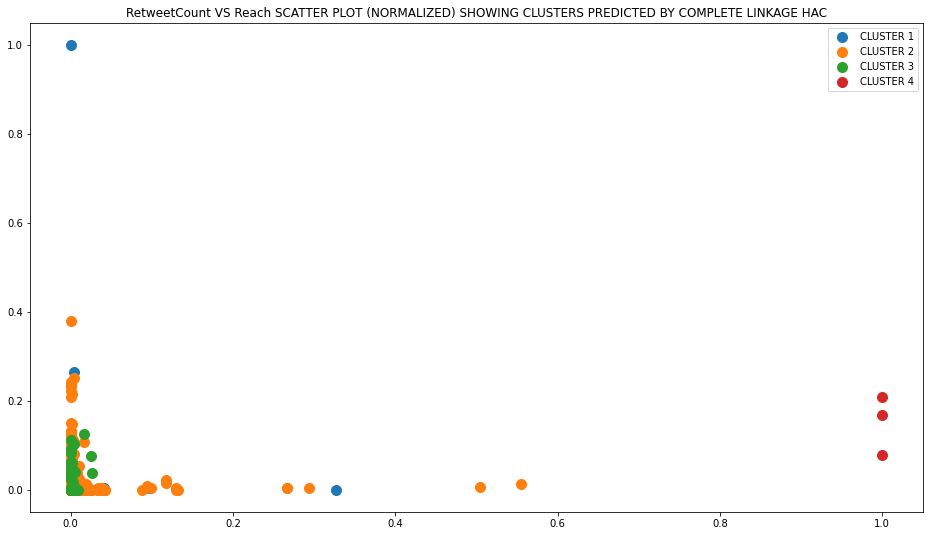

In [51]:
cluster1 = data_test.iloc[progression[0]]
cluster2 = data_test.iloc[progression[1]]
cluster3 = data_test.iloc[progression[2]]
cluster4 = data_test.iloc[progression[3]]

plt.figure(figsize=(16,9))

plt.scatter(y = cluster1['RetweetCount'], x = cluster1['Reach'] ,label = 'CLUSTER 1', s = 100)
plt.scatter(y = cluster2['RetweetCount'], x = cluster2['Reach'] ,label = 'CLUSTER 2', s = 100)
plt.scatter(y = cluster3['RetweetCount'], x = cluster3['Reach'] ,label = 'CLUSTER 3', s = 100)
plt.scatter(y = cluster4['RetweetCount'], x = cluster4['Reach'] ,label = 'CLUSTER 4', s = 100)
plt.legend()

plt.title("RetweetCount VS Reach SCATTER PLOT (NORMALIZED) SHOWING CLUSTERS PREDICTED BY COMPLETE LINKAGE HAC")
plt.show()

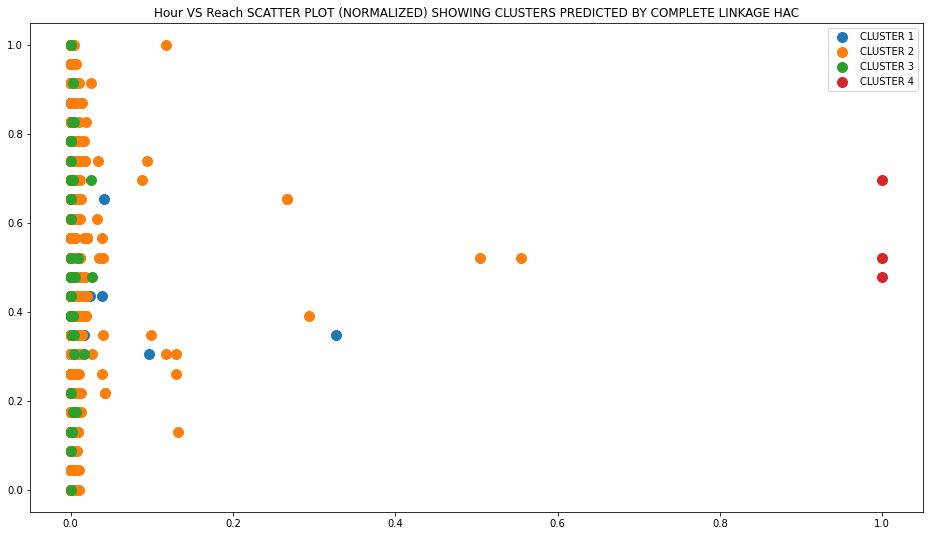

In [52]:
cluster1 = data_test.iloc[progression[0]]
cluster2 = data_test.iloc[progression[1]]
cluster3 = data_test.iloc[progression[2]]
cluster4 = data_test.iloc[progression[3]]

plt.figure(figsize=(16,9))

plt.scatter(y = cluster1['Hour'], x = cluster1['Reach'] ,label = 'CLUSTER 1', s = 100)
plt.scatter(y = cluster2['Hour'], x = cluster2['Reach'] ,label = 'CLUSTER 2', s = 100)
plt.scatter(y = cluster3['Hour'], x = cluster3['Reach'] ,label = 'CLUSTER 3', s = 100)
plt.scatter(y = cluster4['Hour'], x = cluster4['Reach'] ,label = 'CLUSTER 4', s = 100)
plt.legend()

plt.title("Hour VS Reach SCATTER PLOT (NORMALIZED) SHOWING CLUSTERS PREDICTED BY COMPLETE LINKAGE HAC")
plt.show()

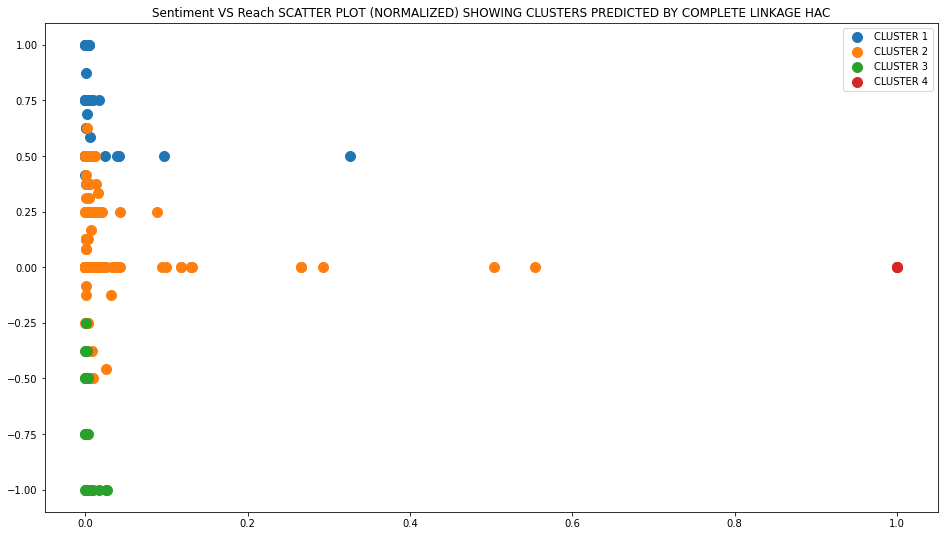

In [53]:
cluster1 = data_test.iloc[progression[0]]
cluster2 = data_test.iloc[progression[1]]
cluster3 = data_test.iloc[progression[2]]
cluster4 = data_test.iloc[progression[3]]

plt.figure(figsize=(16,9))

plt.scatter(y = cluster1['Sentiment'], x = cluster1['Reach'] ,label = 'CLUSTER 1', s = 100)
plt.scatter(y = cluster2['Sentiment'], x = cluster2['Reach'] ,label = 'CLUSTER 2', s = 100)
plt.scatter(y = cluster3['Sentiment'], x = cluster3['Reach'] ,label = 'CLUSTER 3', s = 100)
plt.scatter(y = cluster4['Sentiment'], x = cluster4['Reach'] ,label = 'CLUSTER 4', s = 100)
plt.legend()

plt.title("Sentiment VS Reach SCATTER PLOT (NORMALIZED) SHOWING CLUSTERS PREDICTED BY COMPLETE LINKAGE HAC")
plt.show()

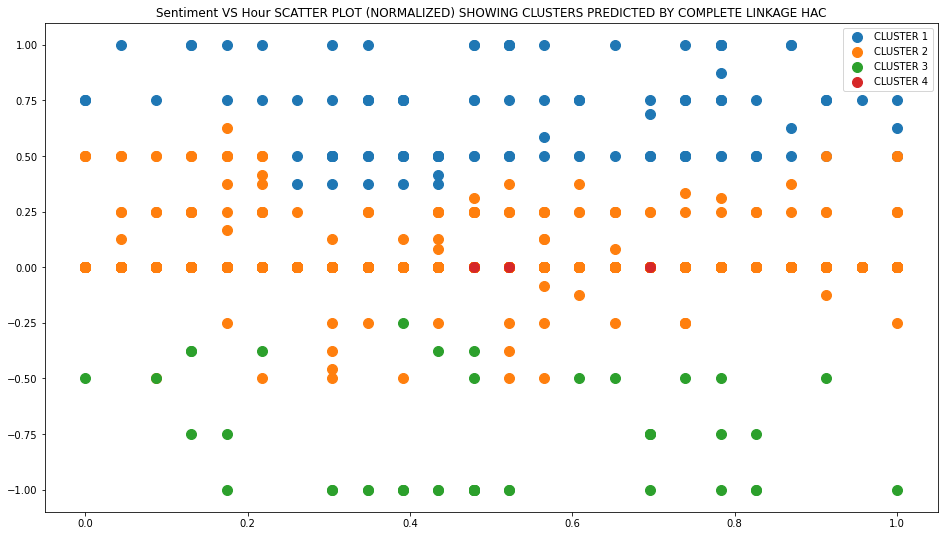

In [54]:
cluster1 = data_test.iloc[progression[0]]
cluster2 = data_test.iloc[progression[1]]
cluster3 = data_test.iloc[progression[2]]
cluster4 = data_test.iloc[progression[3]]

plt.figure(figsize=(16,9))

plt.scatter(y = cluster1['Sentiment'], x = cluster1['Hour'] ,label = 'CLUSTER 1', s = 100)
plt.scatter(y = cluster2['Sentiment'], x = cluster2['Hour'] ,label = 'CLUSTER 2', s = 100)
plt.scatter(y = cluster3['Sentiment'], x = cluster3['Hour'] ,label = 'CLUSTER 3', s = 100)
plt.scatter(y = cluster4['Sentiment'], x = cluster4['Hour'] ,label = 'CLUSTER 4', s = 100)
plt.legend()

plt.title("Sentiment VS Hour SCATTER PLOT (NORMALIZED) SHOWING CLUSTERS PREDICTED BY COMPLETE LINKAGE HAC")
plt.show()

In [55]:
# this is for simple
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
# print(samples)
distance_matrix=create_matrix(samples)


while(len(samples)!=4):    
    a,b,c,d=calculate_distance_simple(samples,distance_matrix,progression)
    print(c,d)
    print("\n")
    join(a,b,c,d,samples,progression)

[4] [6]


[4, 6] [12]


[41] [423]


[78] [462]


[101] [105]


[116] [818]


[169] [171]


[172] [173]


[212] [898]


[269] [941]


[308] [309]


[308, 309] [312]


[339] [344]


[360] [364]


[377] [378]


[377, 378] [383]


[377, 378, 383] [384]


[377, 378, 383, 384] [385]


[377, 378, 383, 384, 385] [387]


[408] [409]


[432] [433]


[435] [441]


[476] [477]


[481] [482]


[486] [813]


[518] [866]


[539] [543]


[597] [609]


[646] [653]


[684] [685]


[737] [738]


[737, 738] [739]


[817] [823]


[824] [825]


[837] [838]


[850] [852]


[850, 852] [853]


[869] [870]


[953] [955]


[971] [986]


[987] [988]


[308, 309, 312] [645]


[116, 818] [489]


[407] [742]


[432, 433] [438]


[78, 462] [85]


[349] [357]


[712] [721]


[279] [597, 609]


[597, 609, 279] [610]


[31] [407, 742]


[118] [492]


[191] [539, 543]


[360, 364] [671]


[524] [869, 870]


[945] [954]


[970] [985]


[298] [979]


[795] [800]


[138] [499]


[287] [298, 979]


[596] [597, 609, 279, 610

[334] [335]


[16] [716]


[351] [670]


[580] [583, 595, 928, 925]


[66, 67, 69, 74, 456, 65, 76, 73] [75]


[260, 931, 252, 927, 932, 251, 253, 261, 593, 937] [582]


[629, 967] [982]


[349, 357] [359, 678]


[445, 761, 769, 58, 771] [763, 773, 444]


[687, 709, 690] [693]


[94, 798] [806]


[160, 865] [167, 170, 166, 163, 155, 507, 164, 857, 159, 154]


[209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546] [210, 215]


[216] [550]


[1, 390, 397, 3, 402, 14, 403, 722, 395, 392, 398, 396, 399] [717, 729, 7]


[298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986] [634]


[787] [789]


[167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865] [858]


[830, 834] [837, 838, 127, 833, 139]


[95, 98] [99]


[158, 512, 859] [508]


[260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582] [935]


[410, 411, 22] [737, 738, 739]


[110] [111, 812]


[428] [429]


[349, 357, 359, 678] [360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 

[118, 492, 122, 820, 826] [816, 819]


[479] [480, 809]


[939] [940]


[235, 912] [237, 906, 915, 568]


[511] [514, 856]


[66, 67, 69, 74, 456, 65, 76, 73, 75, 68, 71] [78, 462, 85, 468, 86, 459, 790, 464, 84, 465, 460, 466, 80, 81, 794]


[209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892]


[229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909] [260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254]


[298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642] [313, 992, 646, 653, 317, 643, 323, 324, 311]


[298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324,

[255, 256, 926] [280, 950, 614, 606, 951, 952]


[212, 898, 555, 216, 550, 221] [237, 906, 915, 568, 235, 912, 250, 268, 266]


[220, 903] [879]


[95, 98, 99] [111, 812, 110]


[55, 61, 449, 452, 772, 60, 63] [760]


[108, 112, 109, 486, 813, 485, 100, 810, 795, 800, 473, 90, 804, 91, 96] [837, 838, 127, 833, 139, 830, 834, 113, 114, 115, 488, 491, 821]


[329, 331, 322] [623, 628, 635, 968, 622]


[144] [162, 855]


[158, 512, 859, 508, 156] [850, 852, 853]


[295, 306, 976] [314, 315]


[62, 446] [457, 780]


[292, 630, 303, 641, 640, 983, 975, 289, 304, 633, 972, 984] [953, 955, 607, 948, 961, 962, 278]


[62, 446, 457, 780] [89]


[108, 112, 109, 486, 813, 485, 100, 810, 795, 800, 473, 90, 804, 91, 96, 837, 838, 127, 833, 139, 830, 834, 113, 114, 115, 488, 491, 821] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 17

[181] [514, 856, 511]


[320] [980, 991]


[291, 631, 316, 330] [956, 959, 276, 271, 275, 286, 602, 617, 957, 608, 605, 583, 595, 928, 925, 580, 228, 234, 233, 567, 563, 244, 248, 222, 900, 211, 896, 623, 628, 635, 968, 622, 329, 331, 322, 535, 158, 512, 859, 508, 156, 850, 852, 853, 125, 140, 498, 831, 133, 519, 867, 526, 520, 817, 823, 123, 117]


[0, 719] [380]


[263] [292, 630, 303, 641, 640, 983, 975, 289, 304, 633, 972, 984, 953, 955, 607, 948, 961, 962, 278, 237, 906, 915, 568, 235, 912, 250, 268, 266, 212, 898, 555, 216, 550, 221, 308, 309, 312, 645, 318, 652, 339, 344, 342, 347, 333, 198, 875, 199, 881, 533, 132, 135, 500, 128, 496, 493, 828, 162, 855, 144, 176, 183, 529, 332, 94, 798, 806, 92, 475, 480, 809, 479, 118, 492, 122, 820, 826, 816, 819, 481, 482, 814, 281, 963, 368, 389, 372, 394, 674, 682, 665, 243, 578, 245, 224, 249, 262, 938, 407, 742, 31, 26, 743, 404, 728, 732, 42, 751, 55, 61, 449, 452, 772, 60, 63, 760, 87, 791, 785, 471, 77]


[95, 98, 99, 111, 812, 110] 

[188, 203, 885, 887] [558, 922, 562]


[32, 36] [725]


[796, 811] [805]


[226, 916] [956, 959, 276, 271, 275, 286, 602, 617, 957, 608, 605, 583, 595, 928, 925, 580, 228, 234, 233, 567, 563, 244, 248, 222, 900, 211, 896, 623, 628, 635, 968, 622, 329, 331, 322, 535, 158, 512, 859, 508, 156, 850, 852, 853, 125, 140, 498, 831, 133, 519, 867, 526, 520, 817, 823, 123, 117, 291, 631, 316, 330, 95, 98, 99, 111, 812, 110]


[292, 630, 303, 641, 640, 983, 975, 289, 304, 633, 972, 984, 953, 955, 607, 948, 961, 962, 278, 237, 906, 915, 568, 235, 912, 250, 268, 266, 212, 898, 555, 216, 550, 221, 308, 309, 312, 645, 318, 652, 339, 344, 342, 347, 333, 198, 875, 199, 881, 533, 132, 135, 500, 128, 496, 493, 828, 162, 855, 144, 176, 183, 529, 332, 94, 798, 806, 92, 475, 480, 809, 479, 118, 492, 122, 820, 826, 816, 819, 481, 482, 814, 281, 963, 368, 389, 372, 394, 674, 682, 665, 243, 578, 245, 224, 249, 262, 938, 407, 742, 31, 26, 743, 404, 728, 732, 42, 751, 55, 61, 449, 452, 772, 60, 63, 760, 87, 791

[292, 630, 303, 641, 640, 983, 975, 289, 304, 633, 972, 984, 953, 955, 607, 948, 961, 962, 278, 237, 906, 915, 568, 235, 912, 250, 268, 266, 212, 898, 555, 216, 550, 221, 308, 309, 312, 645, 318, 652, 339, 344, 342, 347, 333, 198, 875, 199, 881, 533, 132, 135, 500, 128, 496, 493, 828, 162, 855, 144, 176, 183, 529, 332, 94, 798, 806, 92, 475, 480, 809, 479, 118, 492, 122, 820, 826, 816, 819, 481, 482, 814, 281, 963, 368, 389, 372, 394, 674, 682, 665, 243, 578, 245, 224, 249, 262, 938, 407, 742, 31, 26, 743, 404, 728, 732, 42, 751, 55, 61, 449, 452, 772, 60, 63, 760, 87, 791, 785, 471, 77, 263, 637, 969, 502, 214, 247, 454, 777, 768, 778, 274, 947, 600, 618, 328, 994, 981, 650] [977]


[514, 856, 511, 181, 189, 544, 174] [956, 959, 276, 271, 275, 286, 602, 617, 957, 608, 605, 583, 595, 928, 925, 580, 228, 234, 233, 567, 563, 244, 248, 222, 900, 211, 896, 623, 628, 635, 968, 622, 329, 331, 322, 535, 158, 512, 859, 508, 156, 850, 852, 853, 125, 140, 498, 831, 133, 519, 867, 526, 520, 817, 

[292, 630, 303, 641, 640, 983, 975, 289, 304, 633, 972, 984, 953, 955, 607, 948, 961, 962, 278, 237, 906, 915, 568, 235, 912, 250, 268, 266, 212, 898, 555, 216, 550, 221, 308, 309, 312, 645, 318, 652, 339, 344, 342, 347, 333, 198, 875, 199, 881, 533, 132, 135, 500, 128, 496, 493, 828, 162, 855, 144, 176, 183, 529, 332, 94, 798, 806, 92, 475, 480, 809, 479, 118, 492, 122, 820, 826, 816, 819, 481, 482, 814, 281, 963, 368, 389, 372, 394, 674, 682, 665, 243, 578, 245, 224, 249, 262, 938, 407, 742, 31, 26, 743, 404, 728, 732, 42, 751, 55, 61, 449, 452, 772, 60, 63, 760, 87, 791, 785, 471, 77, 263, 637, 969, 502, 214, 247, 454, 777, 768, 778, 274, 947, 600, 618, 328, 994, 981, 650, 977, 587, 934, 956, 959, 276, 271, 275, 286, 602, 617, 957, 608, 605, 583, 595, 928, 925, 580, 228, 234, 233, 567, 563, 244, 248, 222, 900, 211, 896, 623, 628, 635, 968, 622, 329, 331, 322, 535, 158, 512, 859, 508, 156, 850, 852, 853, 125, 140, 498, 831, 133, 519, 867, 526, 520, 817, 823, 123, 117, 291, 631, 316, 

[574] [588, 594]


[32, 36, 725] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 349, 357, 359, 678, 683, 668, 672, 675, 336, 656, 661, 338, 340, 345, 343, 435, 441, 49, 45, 432, 433

[24] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 349, 357, 359, 678, 683, 668, 672, 675, 336, 656, 661, 338, 340, 345, 343, 435, 441, 49, 45, 432, 433, 438, 430, 431, 52, 427, 43

[539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 349, 357, 359, 678, 683, 668, 672, 675, 336, 656, 661, 338, 340, 345, 343, 435, 441, 49, 45, 432, 433, 438, 430, 431, 52, 427, 434, 43

[218, 223] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 349, 357, 359, 678, 683, 668, 672, 675, 336, 656, 661, 338, 340, 345, 343, 435, 441, 49, 45, 432, 433, 438, 430, 431, 52, 4

[539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 349, 357, 359, 678, 683, 668, 672, 675, 336, 656, 661, 338, 340, 345, 343, 435, 441, 49, 45, 432, 433, 438, 430, 431, 52, 427, 434, 43

[259, 604] [310]


[130] [864]


[138, 499, 835, 839, 116, 818, 489, 102, 807] [169, 171, 517]


[217, 554] [280, 950, 614, 606, 951, 952, 255, 256, 926, 295, 306, 976, 314, 315, 334, 335, 361, 664, 366, 11, 592, 282, 33, 48, 776, 424, 752, 305, 19, 38]


[463, 788] [765]


[188, 203, 885, 887, 558, 922, 562, 258, 929, 584, 564, 924, 240, 588, 594, 574] [980, 991, 320, 649]


[4, 6, 12] [666]


[138, 499, 835, 839, 116, 818, 489, 102, 807, 169, 171, 517] [280, 950, 614, 606, 951, 952, 255, 256, 926, 295, 306, 976, 314, 315, 334, 335, 361, 664, 366, 11, 592, 282, 33, 48, 776, 424, 752, 305, 19, 38, 217, 554]


[104, 106, 827, 129, 509, 510, 848, 187, 528, 504, 845, 165, 871, 877, 894, 241, 161] [188, 203, 885, 887, 558, 922, 562, 258, 929, 584, 564, 924, 240, 588, 594, 574, 980, 991, 320, 649]


[21, 746, 735, 718] [51]


[420, 437, 35, 447, 0, 719, 380] [783]


[121, 487, 97, 474, 802] [188, 203, 885, 887, 558, 922, 562, 258, 929, 584, 564, 924, 240, 588, 594, 574, 980, 991, 320, 649, 

[13, 393, 723, 705, 373] [655, 659, 662, 647]


[539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 349, 357, 359, 678, 683, 668, 672, 675, 336, 656, 661, 338, 340, 345, 343, 435, 441, 4

[710] [753, 755, 747]


[321] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 349, 357, 359, 678, 683, 668, 672, 675, 336, 656, 661, 338, 340, 345, 343, 435, 441, 49, 45, 432, 433, 4

[188, 203, 885, 887, 558, 922, 562, 258, 929, 584, 564, 924, 240, 588, 594, 574, 980, 991, 320, 649, 104, 106, 827, 129, 509, 510, 848, 187, 528, 504, 845, 165, 871, 877, 894, 241, 161, 121, 487, 97, 474, 802, 534, 190] [280, 950, 614, 606, 951, 952, 255, 256, 926, 295, 306, 976, 314, 315, 334, 335, 361, 664, 366, 11, 592, 282, 33, 48, 776, 424, 752, 305, 19, 38, 217, 554, 138, 499, 835, 839, 116, 818, 489, 102, 807, 169, 171, 517, 467, 469, 793, 150]


[192] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 

[9] [420, 437, 35, 447, 0, 719, 380, 783]


[573, 601] [599, 611, 598, 613, 624, 590, 293, 565, 575, 585, 542, 560]


[101, 105, 803] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 

[521] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 349, 357, 359, 678, 683, 668, 672, 675, 336, 656, 661, 338, 340, 345, 343, 435, 441, 49, 45, 432, 433, 438, 430, 431, 52, 427, 4

[280, 950, 614, 606, 951, 952, 255, 256, 926, 295, 306, 976, 314, 315, 334, 335, 361, 664, 366, 11, 592, 282, 33, 48, 776, 424, 752, 305, 19, 38, 217, 554, 138, 499, 835, 839, 116, 818, 489, 102, 807, 169, 171, 517, 467, 469, 793, 150, 188, 203, 885, 887, 558, 922, 562, 258, 929, 584, 564, 924, 240, 588, 594, 574, 980, 991, 320, 649, 104, 106, 827, 129, 509, 510, 848, 187, 528, 504, 845, 165, 871, 877, 894, 241, 161, 121, 487, 97, 474, 802, 534, 190, 46, 497, 843, 899, 365] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 

[21, 746, 735, 718, 51] [741]


[530, 571] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 349, 357, 359, 678, 683, 668, 672, 675, 336, 656, 661, 338, 340, 345, 343, 435, 441, 49, 45

[136, 836] [153]


[599, 611, 598, 613, 624, 590, 293, 565, 575, 585, 542, 560, 573, 601] [612]


[13, 393, 723, 705, 373, 655, 659, 662, 647, 566, 921, 615] [30, 405]


[539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685,

[43, 44, 406, 8, 346, 702] [660]


[13, 393, 723, 705, 373, 655, 659, 662, 647, 566, 921, 615, 30, 405, 21, 746, 735, 718, 51, 741] [748]


[680] [990]


[149] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676,

[13, 393, 723, 705, 373, 655, 659, 662, 647, 566, 921, 615, 30, 405, 21, 746, 735, 718, 51, 741, 748, 455, 774, 545] [307]


[13, 393, 723, 705, 373, 655, 659, 662, 647, 566, 921, 615, 30, 405, 21, 746, 735, 718, 51, 741, 748, 455, 774, 545, 307] [523, 861, 501, 537, 548, 913, 895, 120, 797, 476, 477]


[625, 651, 905] [888]


[13, 393, 723, 705, 373, 655, 659, 662, 647, 566, 921, 615, 30, 405, 21, 746, 735, 718, 51, 741, 748, 455, 774, 545, 307, 523, 861, 501, 537, 548, 913, 895, 120, 797, 476, 477] [208, 579, 943]


[264] [911]


[168, 531, 822] [625, 651, 905, 888]


[83] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 56

[5, 28, 762] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 349, 357, 359, 678, 683, 668, 672, 675, 336, 656, 661, 338, 340, 345, 343, 435, 441, 49, 45, 432, 433, 438, 430, 431, 52,

[93, 490] [136, 836, 153]


[272] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 349, 357, 359, 678, 683, 668, 672, 675, 336, 656, 661, 338, 340, 345, 343, 435, 441, 49, 45, 432, 43

[599, 611, 598, 613, 624, 590, 293, 565, 575, 585, 542, 560, 573, 601, 612, 538, 552, 603, 854] [753, 755, 747, 710]


[37] [539, 543, 191, 196, 202, 872, 873, 193, 201, 194, 197, 541, 185, 186, 540, 874, 204, 878, 880, 536, 883, 884, 886, 892, 209, 219, 206, 553, 901, 207, 551, 547, 561, 902, 213, 205, 546, 210, 215, 559, 893, 904, 167, 170, 166, 163, 155, 507, 164, 857, 159, 154, 160, 865, 858, 516, 515, 518, 866, 184, 522, 180, 869, 870, 524, 182, 179, 527, 175, 525, 229, 232, 230, 239, 225, 246, 907, 910, 231, 236, 908, 572, 914, 569, 238, 242, 909, 260, 931, 252, 927, 932, 251, 253, 261, 593, 937, 582, 935, 930, 933, 265, 591, 254, 147, 148, 151, 141, 298, 979, 287, 626, 989, 290, 301, 978, 294, 302, 636, 299, 297, 632, 288, 974, 971, 986, 634, 629, 967, 982, 619, 970, 985, 638, 621, 642, 313, 992, 646, 653, 317, 643, 323, 324, 311, 597, 609, 279, 610, 596, 273, 269, 941, 270, 283, 285, 945, 954, 277, 965, 946, 360, 364, 671, 684, 685, 356, 676, 686, 354, 350, 353, 358, 349, 357, 

In [56]:
# this is the output matrix of single
count=np.zeros((len(progression),7))
HAC=0
for i in range (len(progression)):
    for j in progression[i]:
        count[HAC][Y[j][0]-1]=count[HAC][Y[j][0]-1]+1
    HAC=HAC+1
print(count)

corrects = 0
totals = 0
for row in count:
    corrects += max(row)
    totals += sum(row)

print("\n=============================================================================================")
print("Accuracy of Hierarchical Agglomerative clustering using single linkage is " + str(corrects*100/totals)+ " %")
print("=============================================================================================")

[[  0.   0.   0.   0.   0.   1.   0.]
 [200.   0.   0.   0.  90. 382. 320.]
 [  0.   0.   0.   0.   0.   0.   1.]
 [  1.   0.   0.   0.   0.   0.   1.]]

Accuracy of Hierarchical Agglomerative clustering using single linkage is 38.65461847389558 %


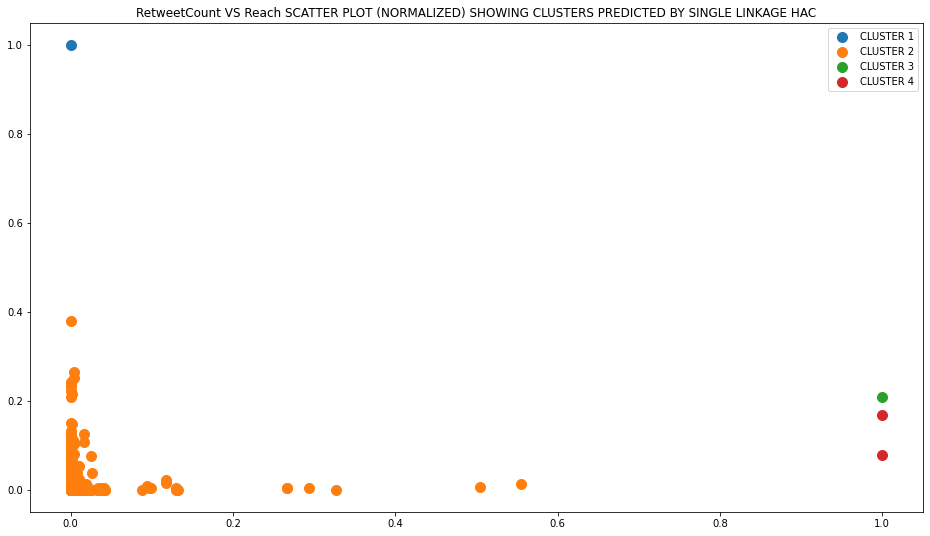

In [57]:
cluster1 = data_test.iloc[progression[0]]
cluster2 = data_test.iloc[progression[1]]
cluster3 = data_test.iloc[progression[2]]
cluster4 = data_test.iloc[progression[3]]

plt.figure(figsize=(16,9))

plt.scatter(y = cluster1['RetweetCount'], x = cluster1['Reach'] ,label = 'CLUSTER 1', s = 100)
plt.scatter(y = cluster2['RetweetCount'], x = cluster2['Reach'] ,label = 'CLUSTER 2', s = 100)
plt.scatter(y = cluster3['RetweetCount'], x = cluster3['Reach'] ,label = 'CLUSTER 3', s = 100)
plt.scatter(y = cluster4['RetweetCount'], x = cluster4['Reach'] ,label = 'CLUSTER 4', s = 100)
plt.legend()

plt.title("RetweetCount VS Reach SCATTER PLOT (NORMALIZED) SHOWING CLUSTERS PREDICTED BY SINGLE LINKAGE HAC")
plt.show()

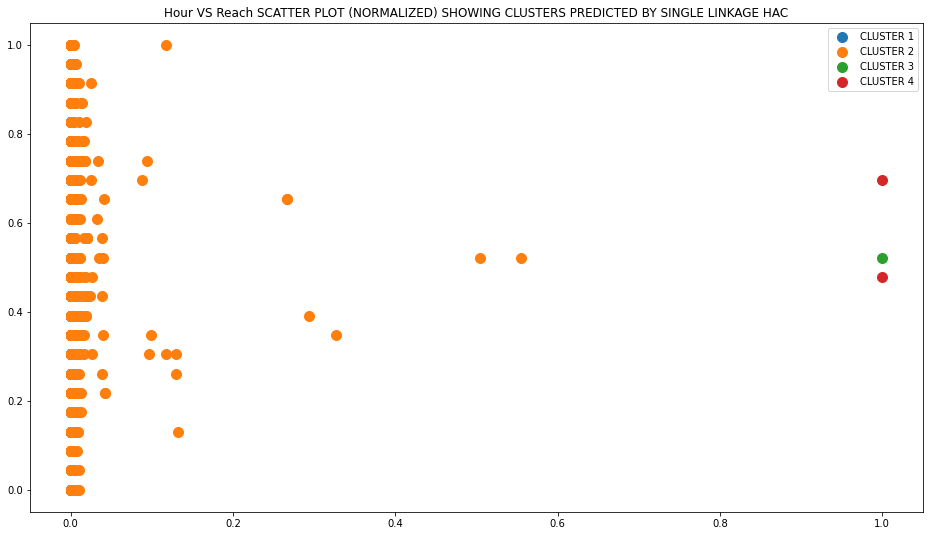

In [58]:
cluster1 = data_test.iloc[progression[0]]
cluster2 = data_test.iloc[progression[1]]
cluster3 = data_test.iloc[progression[2]]
cluster4 = data_test.iloc[progression[3]]

plt.figure(figsize=(16,9))

plt.scatter(y = cluster1['Hour'], x = cluster1['Reach'] ,label = 'CLUSTER 1', s = 100)
plt.scatter(y = cluster2['Hour'], x = cluster2['Reach'] ,label = 'CLUSTER 2', s = 100)
plt.scatter(y = cluster3['Hour'], x = cluster3['Reach'] ,label = 'CLUSTER 3', s = 100)
plt.scatter(y = cluster4['Hour'], x = cluster4['Reach'] ,label = 'CLUSTER 4', s = 100)
plt.legend()

plt.title("Hour VS Reach SCATTER PLOT (NORMALIZED) SHOWING CLUSTERS PREDICTED BY SINGLE LINKAGE HAC")
plt.show()

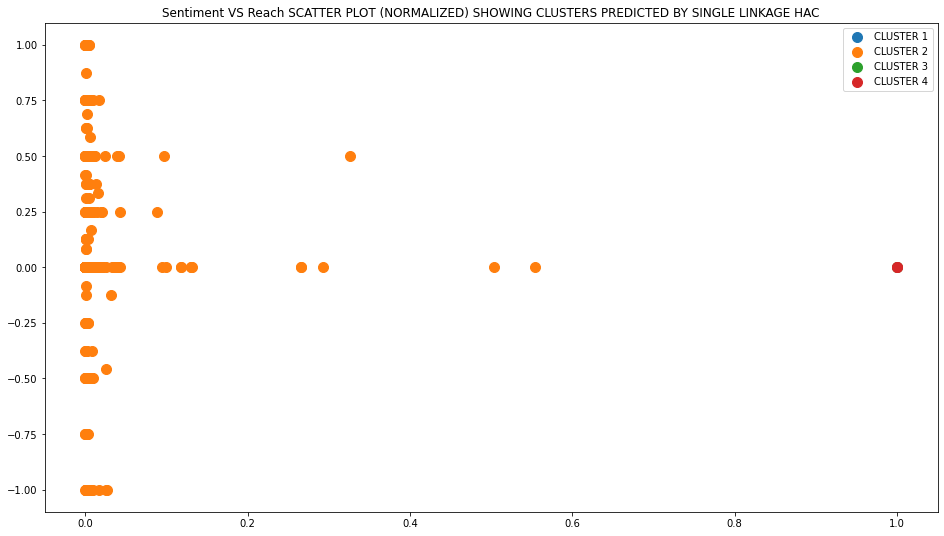

In [59]:
cluster1 = data_test.iloc[progression[0]]
cluster2 = data_test.iloc[progression[1]]
cluster3 = data_test.iloc[progression[2]]
cluster4 = data_test.iloc[progression[3]]

plt.figure(figsize=(16,9))

plt.scatter(y = cluster1['Sentiment'], x = cluster1['Reach'] ,label = 'CLUSTER 1', s = 100)
plt.scatter(y = cluster2['Sentiment'], x = cluster2['Reach'] ,label = 'CLUSTER 2', s = 100)
plt.scatter(y = cluster3['Sentiment'], x = cluster3['Reach'] ,label = 'CLUSTER 3', s = 100)
plt.scatter(y = cluster4['Sentiment'], x = cluster4['Reach'] ,label = 'CLUSTER 4', s = 100)
plt.legend()

plt.title("Sentiment VS Reach SCATTER PLOT (NORMALIZED) SHOWING CLUSTERS PREDICTED BY SINGLE LINKAGE HAC")
plt.show()

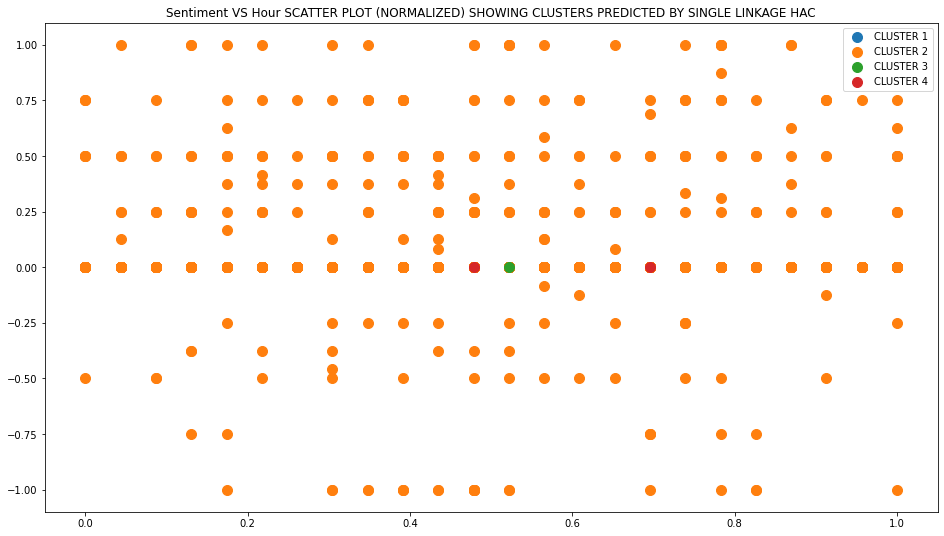

In [60]:
cluster1 = data_test.iloc[progression[0]]
cluster2 = data_test.iloc[progression[1]]
cluster3 = data_test.iloc[progression[2]]
cluster4 = data_test.iloc[progression[3]]

plt.figure(figsize=(16,9))

plt.scatter(y = cluster1['Sentiment'], x = cluster1['Hour'] ,label = 'CLUSTER 1', s = 100)
plt.scatter(y = cluster2['Sentiment'], x = cluster2['Hour'] ,label = 'CLUSTER 2', s = 100)
plt.scatter(y = cluster3['Sentiment'], x = cluster3['Hour'] ,label = 'CLUSTER 3', s = 100)
plt.scatter(y = cluster4['Sentiment'], x = cluster4['Hour'] ,label = 'CLUSTER 4', s = 100)
plt.legend()

plt.title("Sentiment VS Hour SCATTER PLOT (NORMALIZED) SHOWING CLUSTERS PREDICTED BY SINGLE LINKAGE HAC")
plt.show()